## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
import time
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

37.668
Equilibrium Reached at Temp=287.09. At time=22.0
Final Temp(K): 295.29
Final Temp(F): 71.85

True


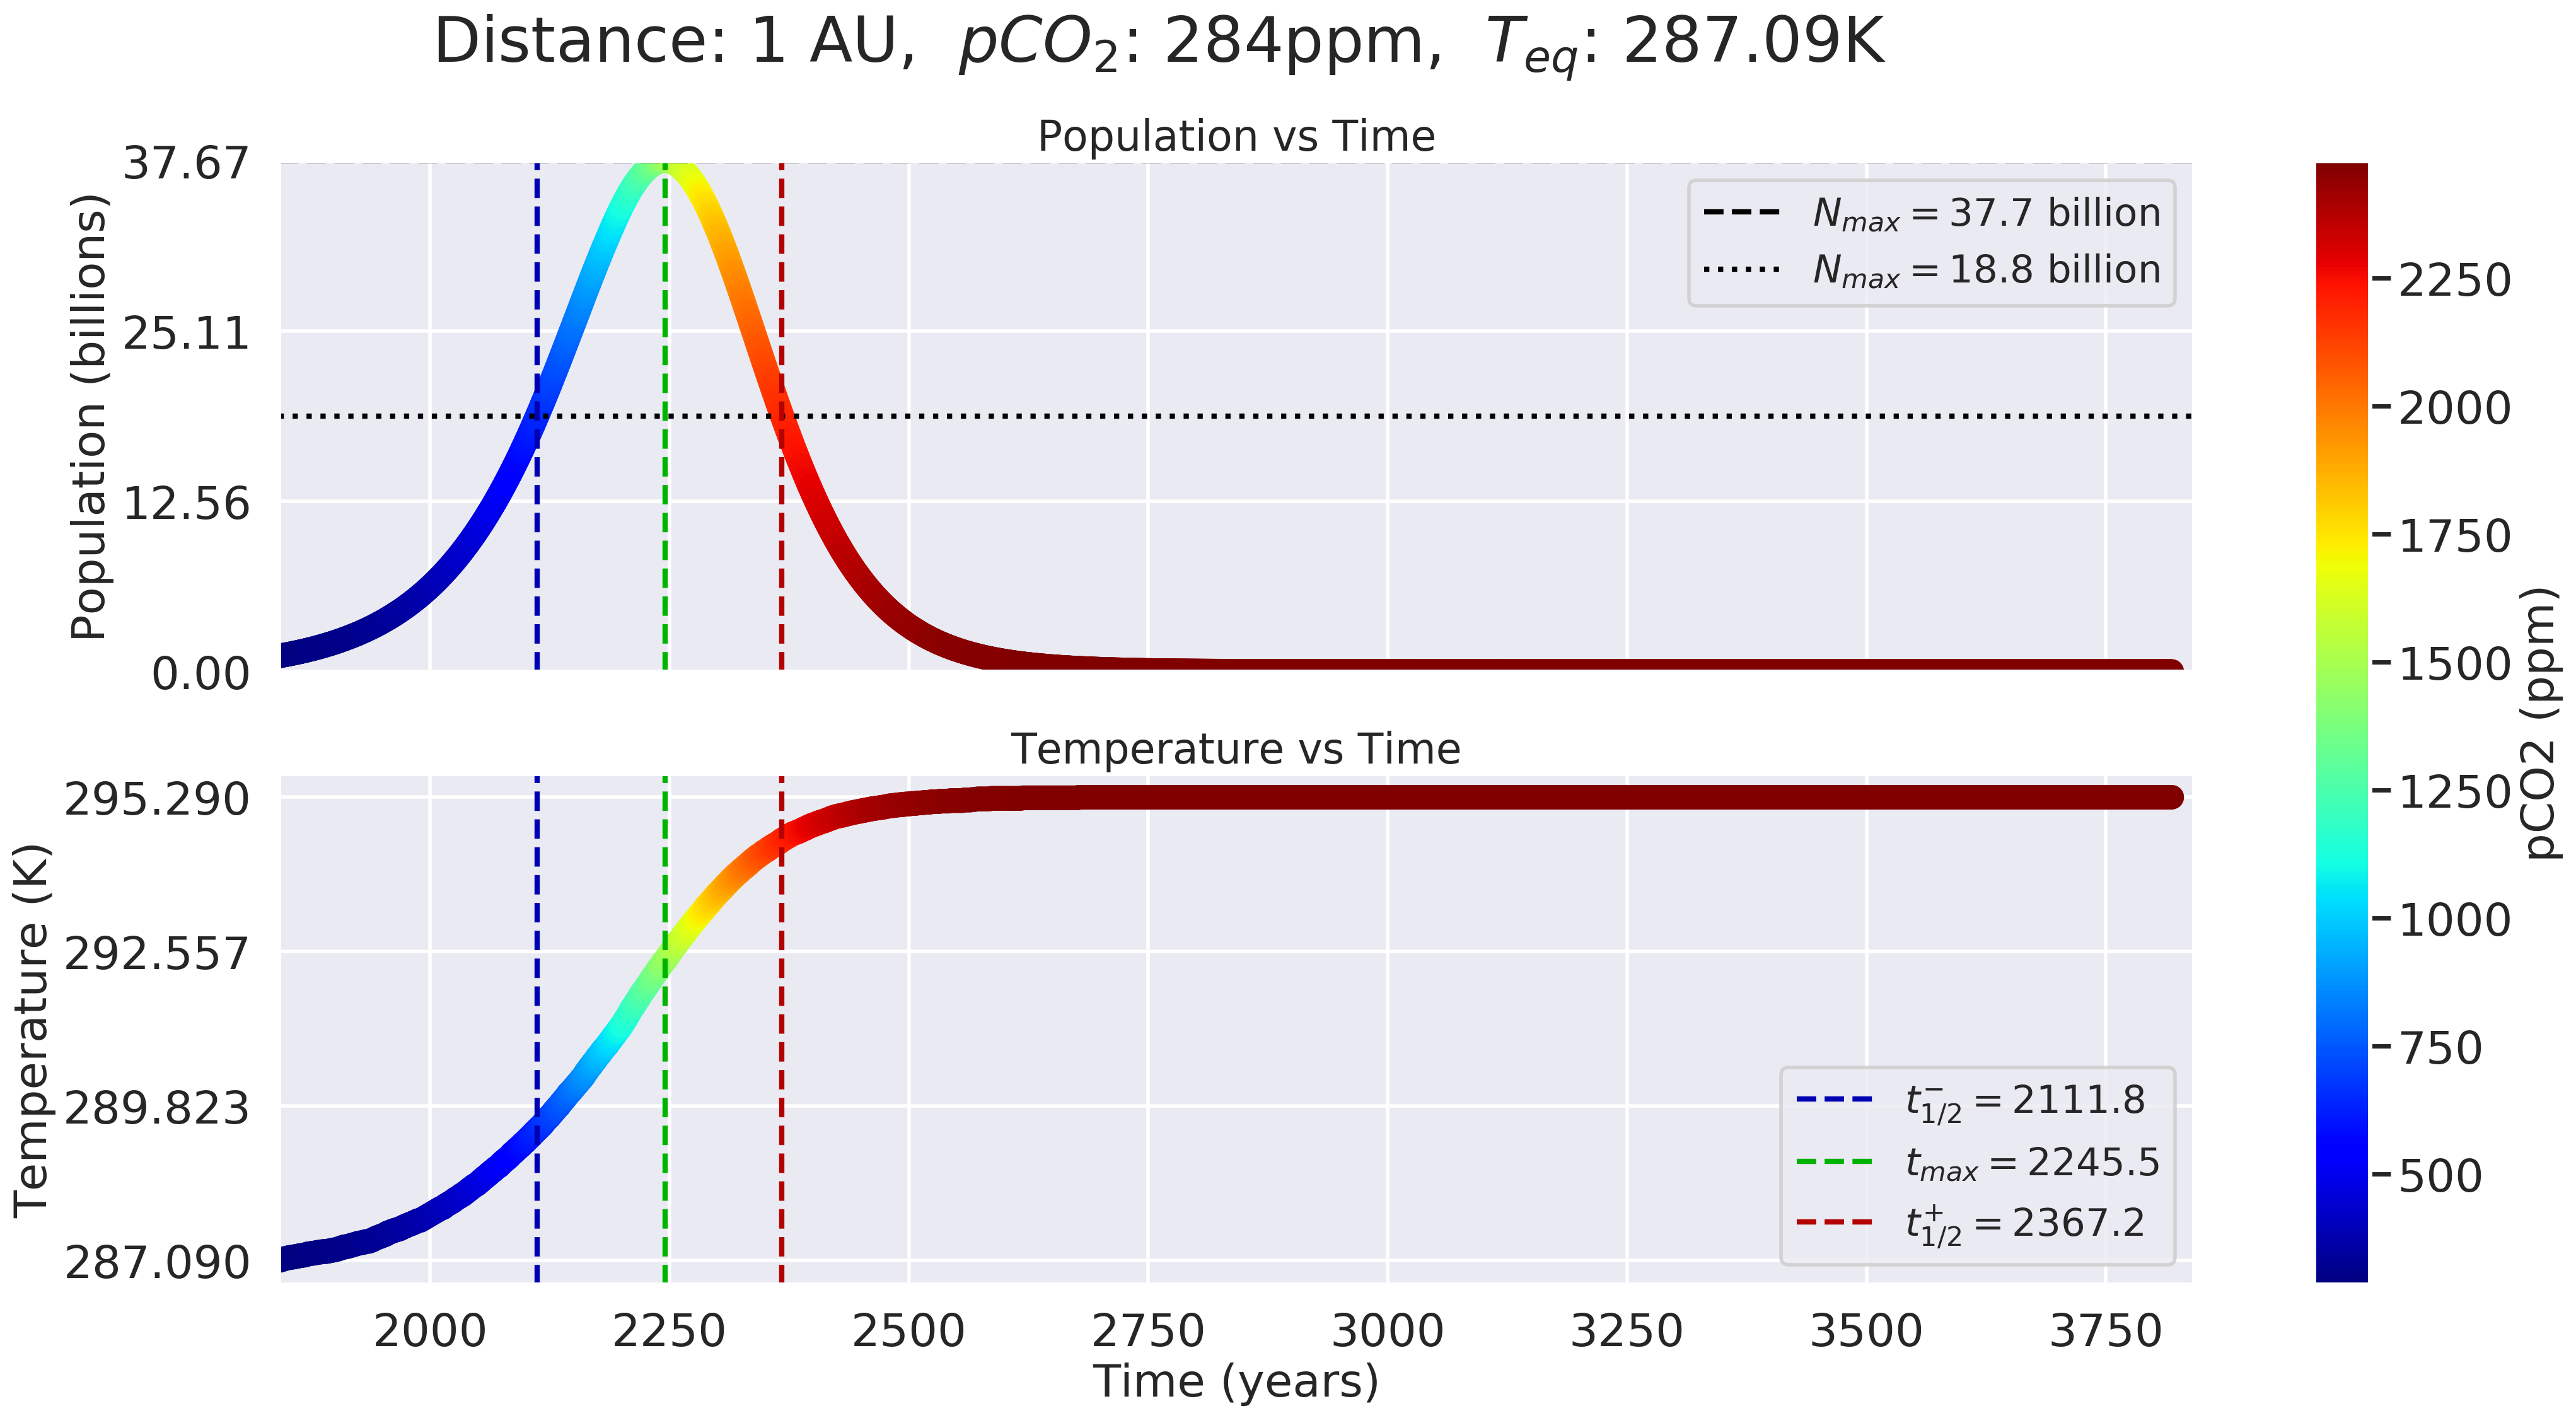

Elapsed Time: 55.90007281303406


In [2]:
nameList = makeDefNamelist() #make namelist
nameList['ebm']['lverbose']=False #controls terminal output, used for debugging
nameList['ebm']['rBirth']=.0252;
nameList['ebm']['rDeath']=.0142857;
nameList['ebm']['rco2']=2.00e-4;
life=False;

start = time.time()

#specify inputs
multP=1
runTime=2000#change runtime(years)
coupled=True
saveName=1;#name of file
fullMaxPop=4
save=True;#save the file
counter=1
FMP = 1;
#for i in np.linspace(284*1000,284*.1,5):#pco2 loops
newPco2=284#change pco2 (ppm)
newA = .9#change distance (AU)
#run the program
dA=.01
minA, maxA, fullMaxPop = habitableZone(nameList,newPco2,newA,runTime,dA)
print(fullMaxPop)
#minA=.94
#maxA=1
#print("Minimum: "+str(minA))
#print("Maximum: "+str(maxA))
#print("Max Pop: " + str(fullMaxPop))
#for i in np.linspace(minA,maxA,4):#population loops
    #run the program
newA = 1 #change distance (AU)
nameList['ebm']['coupled']=coupled
nameList['ebm']['pco20']=newPco2/10**6#convert pco2 to bars
nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux
nameList['ebm']['runTime'] = runTime#change runtime
dfModel, finalavgtemp, eqTime, eqTemp, equilibrium = runProgram("driver.exe",nameList,True)#False=no output
print((equilibrium) and (eqTemp<=373.15) and (eqTemp>=273.15))#determine habitability
#plot the results
if coupled:
    popStats = analyzeRun(dfModel,nameList,False)#True Prints Dictionary Values
#    print("maxPop = "+ str(popStats["maxPop"]))
    #if(counter==1): FMP = popStats['maxPop']
    #popStats['maxPopPlot']=FMP;#maximum population range
    #popStats['maxPopPlot']=fullMaxPop+(3/100)*fullMaxPop#maximum population range
    inputs=[newA,newPco2,runTime]
    if equilibrium: plotModelOutput(dfModel,inputs,eqTime,eqTemp,popStats,save,saveName)#plot the output of our model, colored by pco2 
saveName+=1
counter+=1
end = time.time()
print( "Elapsed Time: " + str(end-start))
call("echo End of Python Notebook Reached", shell=True);

## Model Analysis

In [3]:
#dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
#dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
#plotModelInput(nameList)#plot the temperature dependence on the growth rate
#plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
#compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data